<a href="https://colab.research.google.com/github/Rohith715/Natural_Language_Processing/blob/main/auto_complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#hi there this is a simple code that provides us an idea of how auto complete systems work
!pip install nltk

In [ ]:
import nltk
from nltk.corpus import gutenberg
nltk.download('gutenberg')
print(gutenberg.fileids())
#import novels as text objects
c1 = gutenberg.raw('bryant-stories.txt')
c2 = gutenberg.raw('melville-moby_dick.txt')
c3 = gutenberg.raw('whitman-leaves.txt')
#print first 100 characters of each
print('\nRaw:\n', c1[:50])
print('\nRaw:\n', c2[:50])
print('\nRaw:\n', c3[:50])

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']

Raw:
 [Stories to Tell to Children by Sara Cone Bryant 1

Raw:
 [Moby Dick by Herman Melville 1851]


ETYMOLOGY

Raw:
 [Leaves of Grass by Walt Whitman 1855]


Come, sai


In [ ]:
import re
#utility function for text cleaning
def text_cleaner(text):
  text = re.sub(r'--', ' ', text)
  text = re.sub('[\[].*?[\]]', '', text)
  text = re.sub(r'(\b|\s+\-?|^\-?)(\d+|\d*\.\d+)\b','', text)
  text = ' '.join(text.split())
  return text

In [ ]:
#remove chapter indicator
c1 = re.sub(r'Chapter \d+', '', c1)
c2 = re.sub(r'Chapter \d+', '', c2)
c3 = re.sub(r'Chapter \d+', '', c3)

c1 = text_cleaner(c1)
c2 = text_cleaner(c2)
c3 = text_cleaner(c3)


In [ ]:
cc=c2+c1+c3

In [ ]:
import spacy
from gensim.models import Word2Vec
from collections import defaultdict, Counter
import itertools


nlp = spacy.load("en_core_web_sm")
nlp.max_length = 2000000

text_corpus = cc[:200000] #i am only inputing moby dick story so that i get the desired output

#Preprocessing and tokenizing text
def preprocess_text(corpus):
    doc = nlp(corpus.lower())
    tokens = [token.text for token in doc if token.is_alpha]# isalpha for only alphabets
    return tokens

tokens = preprocess_text(text_corpus)


w2v_model = Word2Vec([tokens], vector_size=100, window=5, min_count=5, workers=4)

unigrams = Counter(tokens)
bigrams = Counter(zip(tokens, tokens[1:]))
trigrams = Counter(zip(tokens, tokens[1:], tokens[2:]))

# Helper function to get next word predictions from n-grams
def get_ngram_predictions(context):
    # Trigram predictions
    if len(context) >= 2:
        trigram_key = (context[-2], context[-1])
        trigram_preds = {k[2]: v for k, v in trigrams.items() if k[:2] == trigram_key}
        if trigram_preds:
            return trigram_preds

    # Bigram predictions
    if len(context) >= 1:
        bigram_key = (context[-1],)
        bigram_preds = {k[1]: v for k, v in bigrams.items() if k[:1] == bigram_key}
        if bigram_preds:
            return bigram_preds

    # Unigram fallback
    return unigrams

# Step 4: Autocomplete function
def autocomplete(input_text):
    context = preprocess_text(input_text)
    if not context:
        return []

    ngram_predictions = get_ngram_predictions(context)
    if ngram_predictions:
        sorted_ngram_preds = sorted(ngram_predictions.items(), key=lambda x: -x[1])
        return [word for word, _ in sorted_ngram_preds[:5]]


    last_word = context[-1]
    if last_word in w2v_model.wv:
        similar_words = w2v_model.wv.most_similar(last_word, topn=5)
        return [word for word, _ in similar_words]

    return [word for word, _ in unigrams.most_common(5)]

# Test the autocomplete function
input_text = "him" #this is one of the popular line from mody dick, which is "Ignoreance is the parent of fear".
suggestions = autocomplete(input_text)
print("Suggestions:", suggestions)


Suggestions: ['and', 'but', 'as', 'he', 'to']


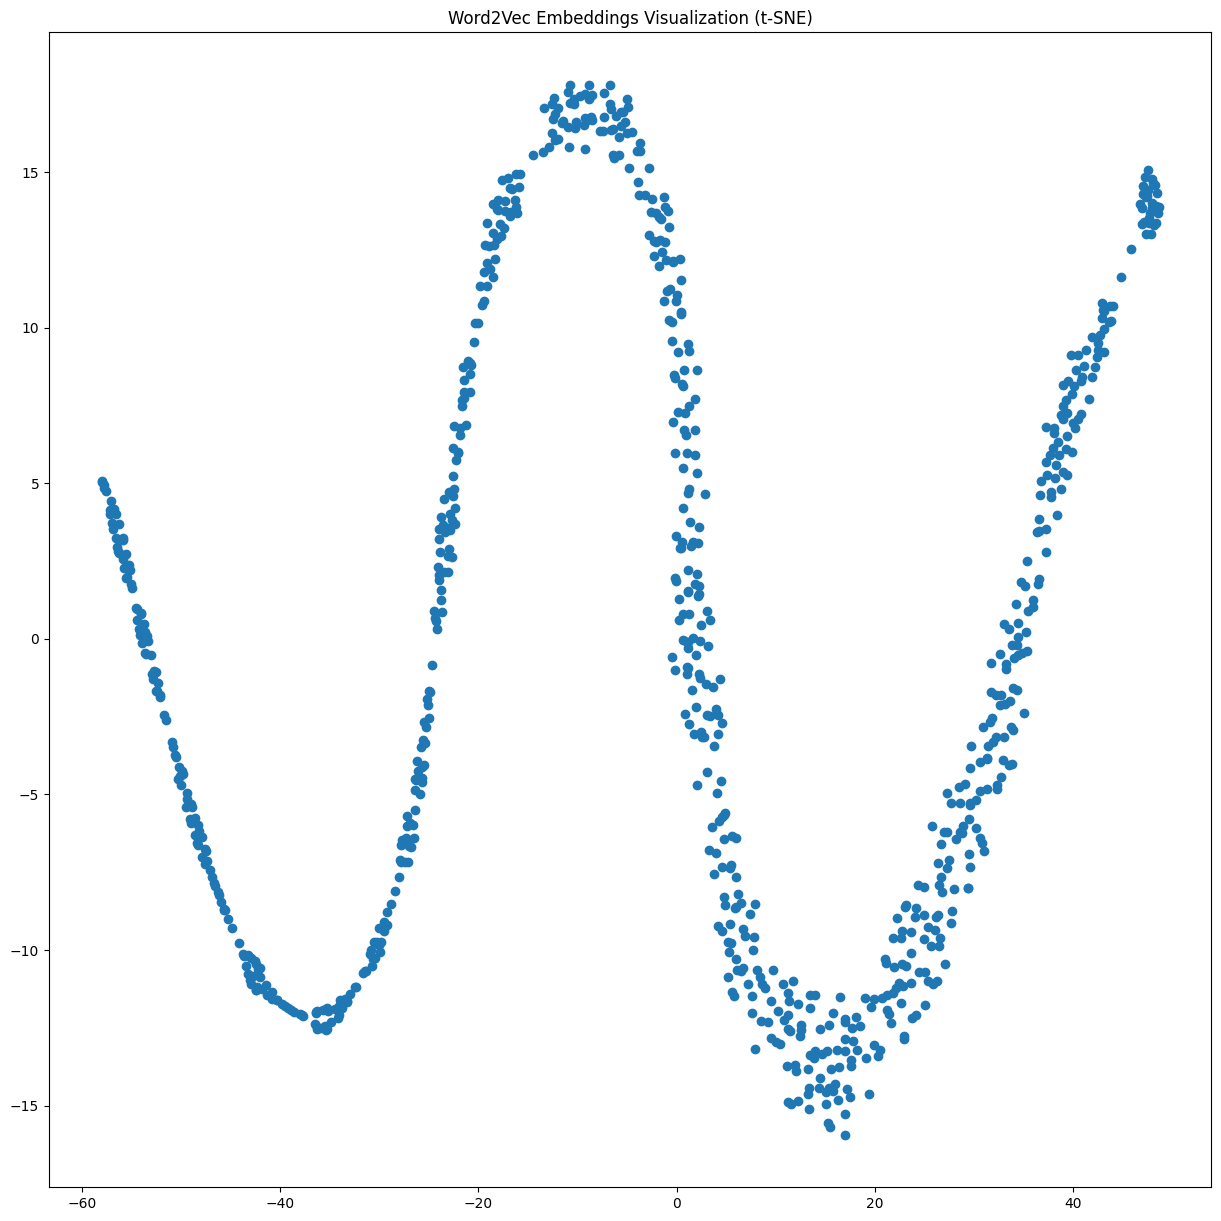

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Get embeddings for a subset of words
words = list(w2v_model.wv.key_to_index)[:1000]
embeddings = w2v_model.wv[words]

# Reduce dimensionality to 2D using t-SNE
tsne = TSNE(n_components=2)
embeddings_2d = tsne.fit_transform(embeddings)
plt.figure(figsize=(15, 15))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])

for i, word in enumerate(words):
    plt.annotate(" ", xy=(embeddings_2d[i, 0], embeddings_2d[i, 1]))

plt.title("Word2Vec Embeddings Visualization (t-SNE)")
plt.show()

Text(0.5, 1.0, 'Proportion of Wordings from Each Corpus')

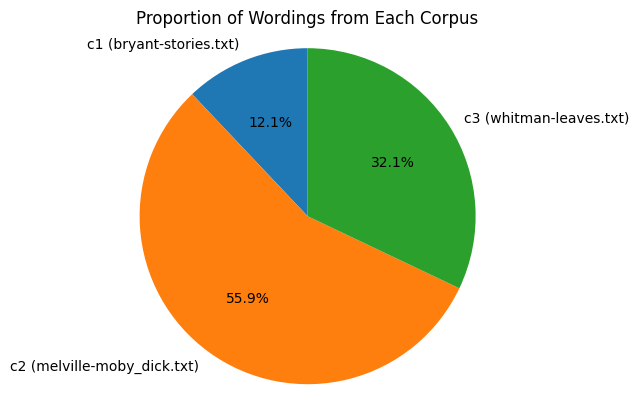

In [ ]:
import matplotlib.pyplot as plt

# Calculate word counts for each corpus
c1_word_count = len(c1.split())
c2_word_count = len(c2.split())
c3_word_count = len(c3.split())

# Create labels and data for the pie chart
labels = ['c1 (bryant-stories.txt)', 'c2 (melville-moby_dick.txt)', 'c3 (whitman-leaves.txt)']
sizes = [c1_word_count, c2_word_count, c3_word_count]

# Create the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of Wordings from Each Corpus')

#To see the output, run the code.

In [ ]:
test_content=["From hell's heart I stab at thee; for hate's sake I spit my last breath at thee. Ye damned whale!","Call me Ishmael.","I know not all that may be coming, but be it what it will, I’ll go to it laughing.","It is not down on any map; true places never are.","For there is no folly of the beast of the earth which is not infinitely outdone by the madness of men."]
for x in test_content:
  a=x.split(" ")
  l=""
  for g in a[:len(a)-1]:
    l=l+g+" "
  predict=autocomplete(l)
  #the below print statements can show us how the sentence in the text has an ending word, which is the same as the prediceted word
  print("\n")
  print(" ".join(a),"\n",a[-1])




From hell's heart I stab at thee; for hate's sake I spit my last breath at thee. Ye damned whale! 
 whale!


Call me Ishmael. 
 Ishmael.


I know not all that may be coming, but be it what it will, I’ll go to it laughing. 
 laughing.


It is not down on any map; true places never are. 
 are.


For there is no folly of the beast of the earth which is not infinitely outdone by the madness of men. 
 men.


In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Function to calculate the average cosine similarity between related word pairs
def evaluate_word_similarity(model, word_pairs):
    similarities = []
    for word1, word2 in word_pairs:
        if word1 in model.wv and word2 in model.wv:
            similarity = cosine_similarity(model.wv[word1].reshape(1, -1), model.wv[word2].reshape(1, -1))
            similarities.append(similarity[0][0])
    return similarities

# Define your word pairs (e.g., synonyms, antonyms, related concepts)
word_pairs = [
    ("good", "great"),
    ("he","she"),
    ("whale","fish"),
    ("strong","great"),
    ("fish","he")
    # ... add more pairs
]

# Calculate average similarity score
average_similarity = evaluate_word_similarity(w2v_model, word_pairs)

# Print the result
print(average_similarity)

[0.99942786, 0.9976949, 0.9983984, 0.99533963, 0.9982578]


In [ ]:
#calculate the mean square error
import math
a=np.mean(average_similarity)

gg=[]
for x in average_similarity:
  hh = a-x
  hh=hh*hh
  gg.append(f"{hh:.18f}")
print(gg)



['0.000002573264509920', '0.000000016590892216', '0.000000330289253725', '0.000006170669166750', '0.000000188443351590']


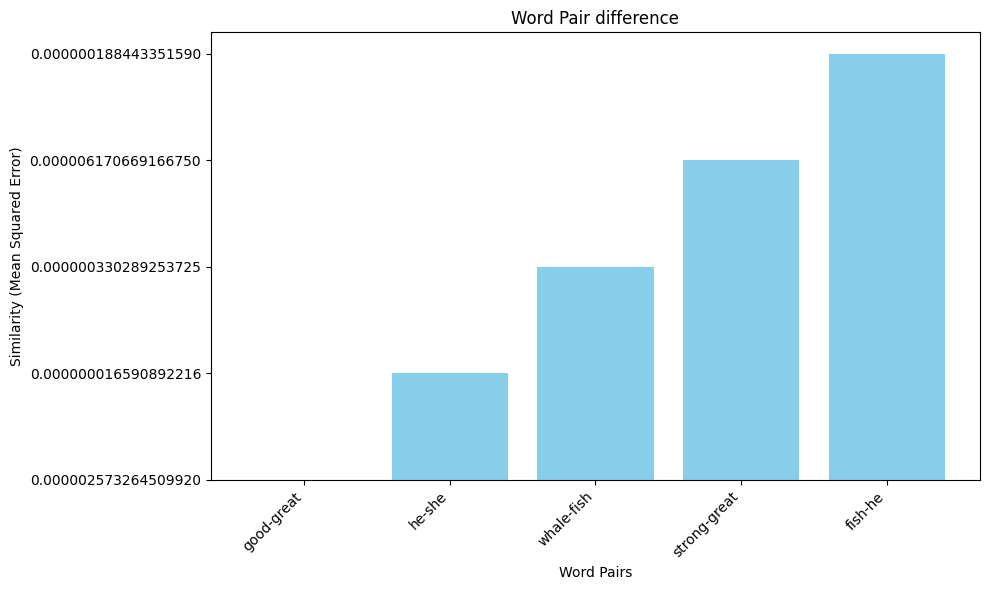

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'word_pairs' and 'gg' from your existing Python code
word_pairs = ["good-great", "he-she", "whale-fish", "strong-great", "fish-he"]


# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(word_pairs, gg, color='skyblue')
plt.title('Word Pair difference')
plt.xlabel('Word Pairs')
plt.ylabel('Similarity (Mean Squared Error)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout for better spacing

#the word pair difference gives us how well the model is able to infer the difference between the word pairs of different classes